####  This little project is performed by SRUJAN HUKERIKAR .
#### Date 10-8-2021 .
#### project no: 001 
# Heart disease prediction using machine learning 


# 1.  Imoporting all required tools

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import plot_roc_curve

# 2. Loading csv data 

In [2]:
df =pd.read_csv("./6.1 heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


# 3. visualising the comparsion

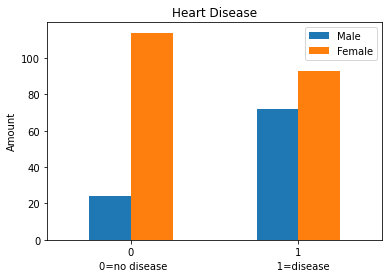

In [4]:
pd.crosstab(df.target,df.sex).plot(kind="bar");
plt.legend(["Male","Female"]);
plt.title("Heart Disease");
plt.xlabel("0=no disease                                   1=disease");
plt.ylabel("Amount");
plt.xticks(rotation=0);

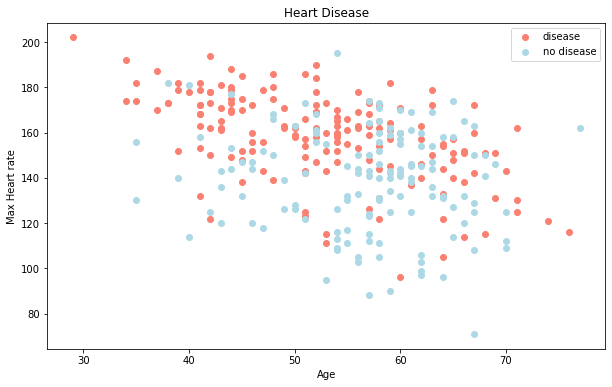

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue");
plt.legend(["disease","no disease"]);
plt.title("Heart Disease");
plt.xlabel("Age");
plt.ylabel("Max Heart rate");

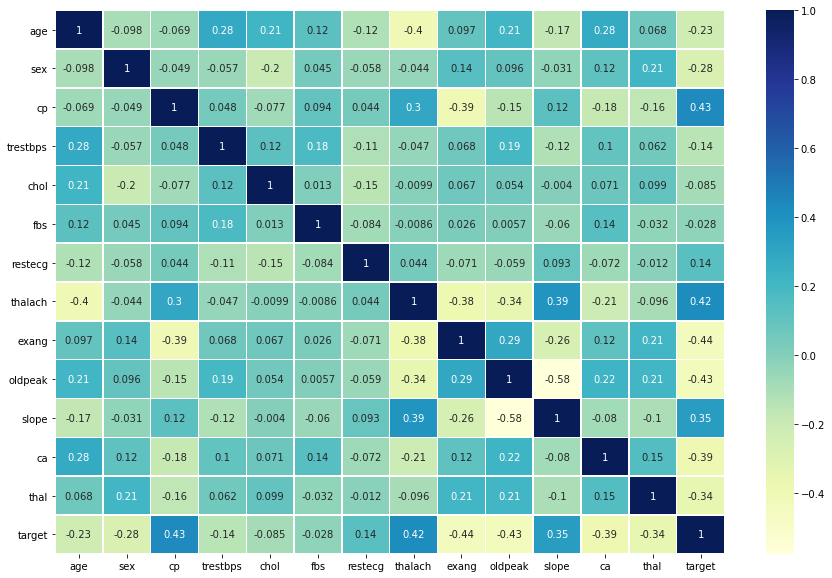

In [6]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,cmap="YlGnBu")

# 4.creating x and y attributes as well as training and testing data


In [7]:
np.random.seed(42)
x=df.drop("target", axis=1)
y=df["target"]
y.describe

<bound method NDFrame.describe of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [9]:

models={"Logitical regression ":LogisticRegression(),
        "Random Forest"        :RandomForestClassifier(),
        "KNN"                  :KNeighborsClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores


In [10]:

model_scores = fit_and_score(models=models,
              x_train=x_train
              ,x_test=x_test
              ,y_train=y_train
              ,y_test=y_test)
model_scores

C:\anaconda 3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logitical regression ': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.6885245901639344}

# Model comparison


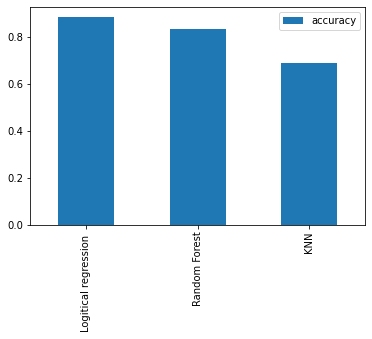

In [11]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

# LogisticRegression is winner !!!!

###  *  Now we got our our model now we have to hyper parameter tune  model to improve accuracy

#### let's look at all of these:
* hyperparameter tunning
* Feature importance
* cross-validation
* precision
* recall
* roc curve
* classification report
* f1 score
* area under the curve (AUC)

In [12]:
train_scores=[]
test_scores=[]
neighbors = range(1,12)
knn=KNeighborsClassifier()
for i in  neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
print(train_scores)
print(test_scores)

[1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273]
[0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377]


maximum knn score on test data :75.41%


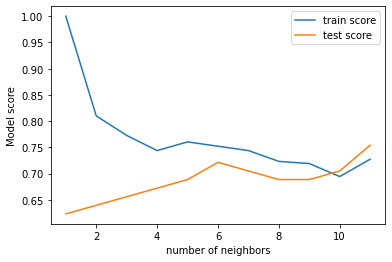

In [13]:
plt.plot(neighbors,train_scores,label="train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xlabel("number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"maximum knn score on test data :{max(test_scores)*100:.2f}%")

## hyperparameter tuning with RandomizdSearchCV
we are going ro tune:
* logisticRegression()
* RandomForestClassifier() ..using RandomizedSearchCV

In [14]:
# create a hyperparameter for Logistic Regression
log_reg_grid={"C": np.logspace(-4,4,20),"solver":["liblinear"]}
# create a hyperparameter for RandomForestClassifier
rf_grid={"n_estimators": np.arange(-10,1000.50),
        "max_depth":[None,3,5,10],
        "min_samples_split": np.arange(2,20,2),
        "min_samples_lead": np.arange(1,20,2)}




now we got hyperparameter grids setuo for each of our models ,lets tune them using RandomizedSearchCV

In [15]:
#TUne LogisticRegression
np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                             cv=5,n_iter=20,
                             verbose=True)
rs_log_reg.fit(x_train ,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [16]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [17]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

now we tuned Logisticregression(),let's do the same for RandomForestClassifier()..

## Hyperparameter tuning with GridsearchCV  

In [18]:
log_reg_grid={"C": np.logspace(-4,4,30),"solver":["liblinear"]}
gs_log_reg= GridSearchCV(
    LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [19]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [20]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluting our tuned ML classifier :
* precision
* recall
* ROC curve
* classification report
* f1 score
* area under the curve (AUC)

#### making prediction to compare our model.


In [29]:
y_pred=gs_log_reg.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

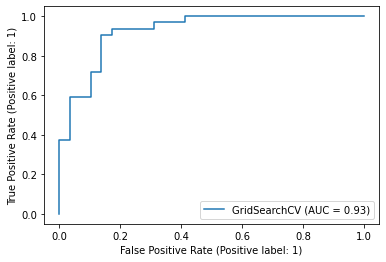

In [30]:
# plot ROC curve and AUC
plot_roc_curve(gs_log_reg,x_test,y_test)

### ploating confusion materix 

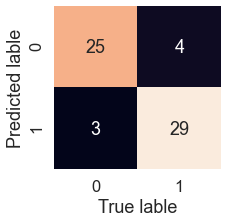

In [36]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test,y_pred),
                    annot = True,
                    cbar=False)
    plt.xlabel("True lable")
    plt.ylabel("Predicted lable")
plot_conf_mat(y_test,y_pred)

In [37]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [40]:
gs_log_reg.best_params_
clf= LogisticRegression(C =0.20433597178569418,solver ="liblinear" )

In [50]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring = "precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [52]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring = "accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [55]:
# Cross-validated f1_score
cv_f1_score = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring = "f1")
cv_f1_score=np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

In [54]:
# Cross-validated f1_recall
cv_recall = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring = "recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

<AxesSubplot:title={'center':'cross-validatedd classfication matrics'}>

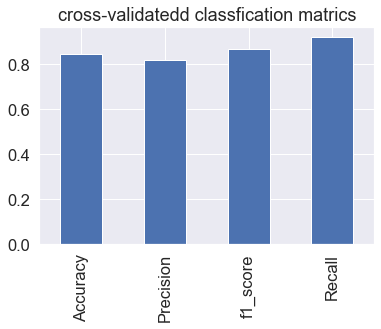

In [65]:
cv_DataFrame=pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "f1_score":cv_f1_score,
                          "Recall" : cv_recall},
                         index=[0])
cv_DataFrame.T.plot.bar(title="cross-validatedd classfication matrics",legend=False)

In [70]:
clf.fit(x_train,y_train)
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [90]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))

In [91]:
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

<AxesSubplot:title={'center':'Feature Importance'}>

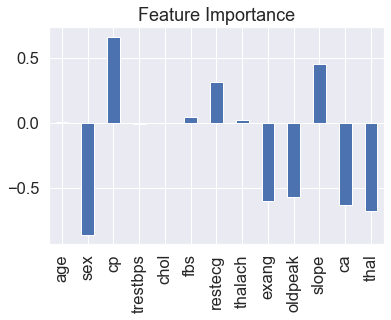

In [98]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)